<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/07_Animal_Classification_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil

In [ ]:
# Define source and target directories
source_dir = "/kaggle/input/d-vs-c-112724/train/train"
cat_dir = '/kaggle/working/d-vs-c-112724/data/cat'       # Replace with the path where you want to move cat images
dog_dir = '/kaggle/working/d-vs-c-112724/data/dog'       # Replace with the path where you want to move dog images

# Ensure the target directories exist
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# List all files in the source directory
files = os.listdir(source_dir)

# Loop through each file and move it to the appropriate folder
for file in files:
    file_path = os.path.join(source_dir, file)

    if os.path.isfile(file_path):
        if 'cat' in file:
            # Move cat files to the cat directory
            shutil.copy(file_path, os.path.join(cat_dir, file))
            print(f"Moved {file} to {cat_dir}")
        elif 'dog' in file:
            # Move dog files to the dog directory
            shutil.copy(file_path, os.path.join(dog_dir, file))
            print(f"Moved {file} to {dog_dir}")

Moved cat.12461.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved dog.3443.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved dog.7971.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved dog.10728.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved dog.1942.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved dog.375.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved cat.10176.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved cat.8194.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved dog.3259.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved cat.3498.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved dog.790.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved cat.891.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved cat.6912.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved dog.6319.jpg to /kaggle/working/d-vs-c-112724/data/dog
Moved cat.6932.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved cat.2842.jpg to /kaggle/working/d-vs-c-112724/data/cat
Moved dog.10577.jpg to /

In [ ]:
dog_count = len(os.listdir("/kaggle/working/d-vs-c-112724/data/dog"))
cat_count = len(os.listdir("/kaggle/working/d-vs-c-112724/data/cat"))
print("Dog pictures: ", dog_count)
print("Cat pictures: ", cat_count)

Dog pictures:  12500
Cat pictures:  12500


In [ ]:
IMAGE_WIDTH=227
IMAGE_HEIGHT=227
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=32

In [ ]:
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# TODO Use tf.keras.utils.image_dataset_from_directory to assign 80% images to the train dataset
(train_ds, val_ds) = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/working/d-vs-c-112724/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


In [ ]:
class_names = val_ds.class_names
print(class_names)

['cat', 'dog']


In [ ]:
# Print the number of batches in each dataset
print(f'Training dataset size: {len(train_ds)} batches')
print(f'Validation dataset size: {len(val_ds)} batches')

Training dataset size: 625 batches
Validation dataset size: 157 batches


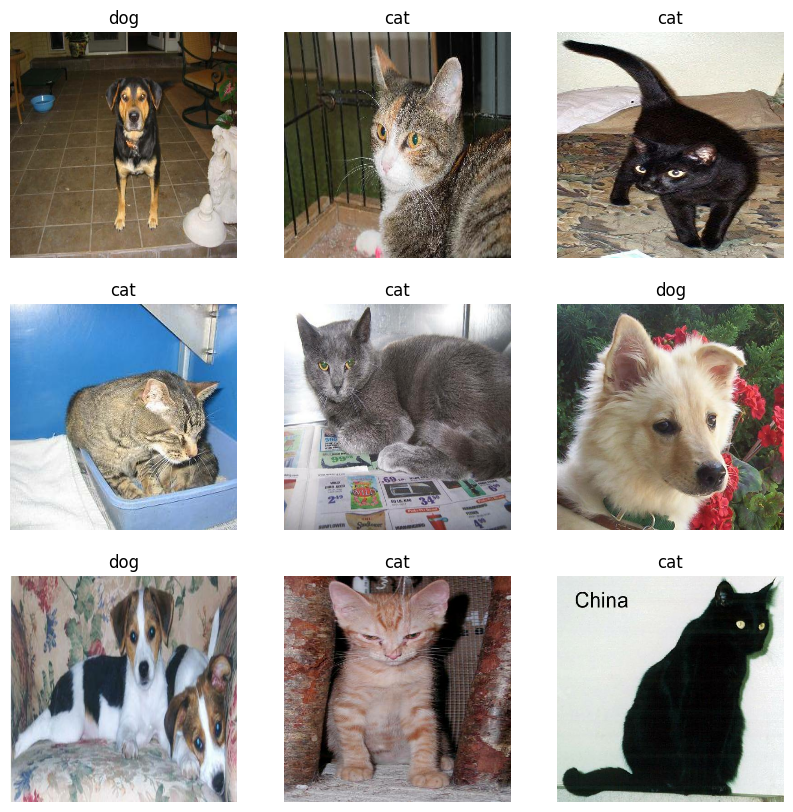

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Model Preparation**

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# TODO: Design an AlexNet model
model = keras.Sequential()

model.add(Input(shape=(227, 227, 3)))
model.add(Conv2D(96,(11, 11), strides=4, activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,045,642 (110.80 MB)

 Trainable params: 29,045,642 (110.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10

train = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    callbacks=callbacks
)

Epoch 1/10


I0000 00:00:1732672680.120120      83 service.cc:145] XLA service 0x79a934010500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732672680.120184      83 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732672680.120189      83 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/625 ━━━━━━━━━━━━━━━━━━━━ 2:05:53 12s/step - accuracy: 0.1562 - loss: 2.2508

I0000 00:00:1732672690.174668      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.5056 - loss: 0.9078 - val_accuracy: 0.5918 - val_loss: 0.6505 - learning_rate: 1.0000e-04
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6351 - loss: 0.6478 - val_accuracy: 0.7502 - val_loss: 0.5035 - learning_rate: 1.0000e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7568 - loss: 0.5066 - val_accuracy: 0.8374 - val_loss: 0.3741 - learning_rate: 1.0000e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8247 - loss: 0.3913 - val_accuracy: 0.8484 - val_loss: 0.3540 - learning_rate: 1.0000e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.8639 - loss: 0.3152 - val_accuracy: 0.8348 - val_loss: 0.4617 - learning_rate: 1.0000e-04
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8838 - loss: 0.2693
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.8

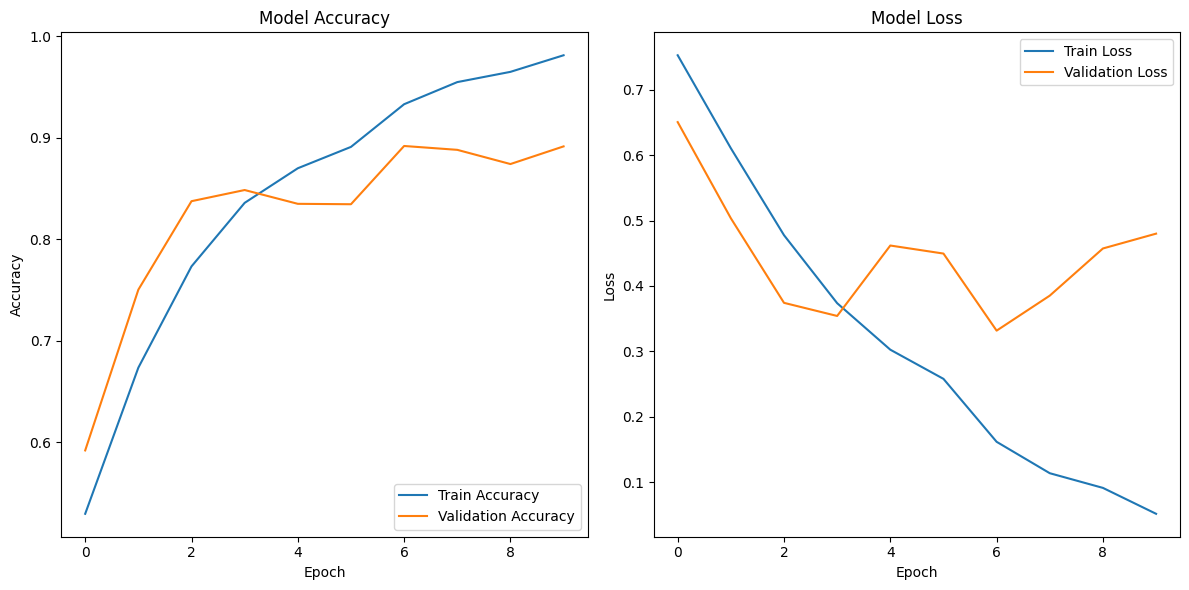

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot loss and accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Train Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Train Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

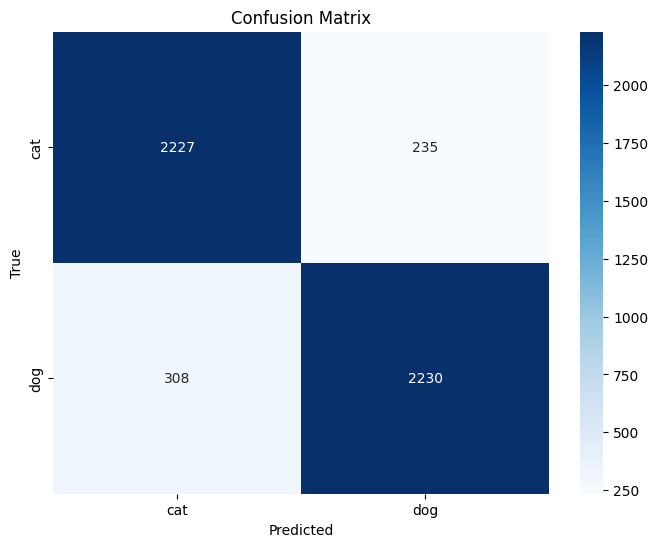

In [ ]:
from sklearn.metrics import confusion_matrix

# Step 1: Extract true labels (y_true) and predicted labels (y_pred) from the validation dataset
y_true = []
y_pred = []

for images, labels in val_ds:
    # Get true labels
    y_true.extend(labels.numpy())  # Convert tensor to numpy array and append to y_true

    # Get predictions
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=-1))  # Convert predictions to class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define source and target directories
source_dir = "/kaggle/input/d-vs-c-112724/test1/test1"
test_dir = '/kaggle/working/d-vs-c-112724/data/test'

# Ensure the target directories exist
os.makedirs(test_dir, exist_ok=True)


# List all files in the source directory
files = os.listdir(source_dir)

# Loop through each file and move it to the appropriate folder
for file in files:
    file_path = os.path.join(source_dir, file)

    if os.path.isfile(file_path):
        # Copy cat files to the cat directory
        shutil.copy(file_path, os.path.join(test_dir, file))
        print(f"Copied {file} to {test_dir}")

Copied 7981.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 6234.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 1269.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 3863.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 6241.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 10304.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 623.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 2193.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 11925.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 3750.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 11378.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 2008.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 10730.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 5982.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 7737.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 2081.jpg to /kaggle/working/d-vs-c-112724/data/test
Copied 10597.jpg to /kaggle/working/d-vs-c-112724/dat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


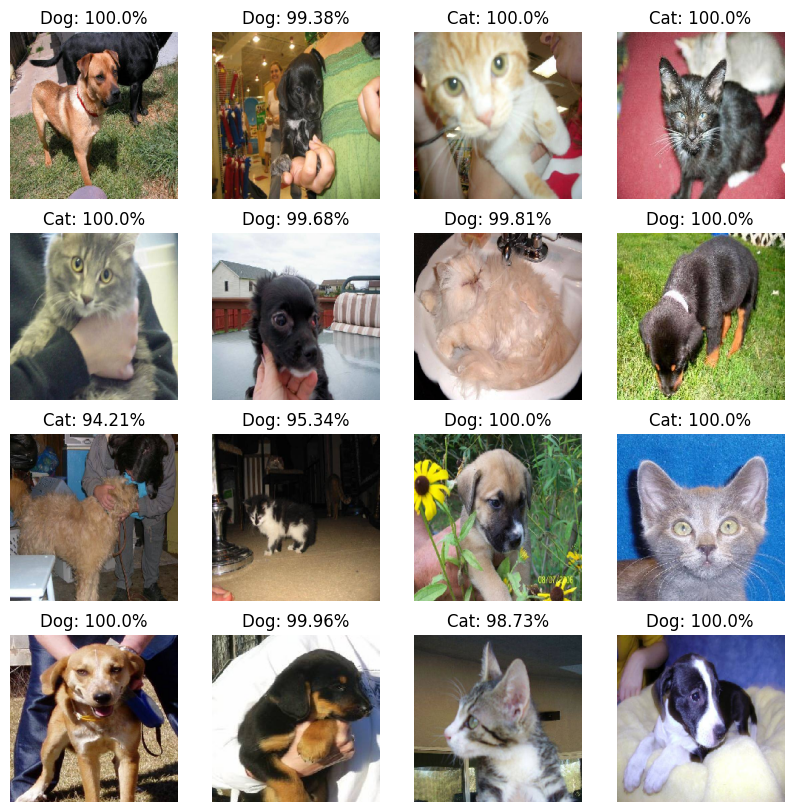

In [ ]:
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Define image size
# IMAGE_WIDTH = 224  # Match the input size the model expects (e.g., AlexNet typically uses 224x224)
# IMAGE_HEIGHT = 224
# IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)  # Target size for loading images

plt.figure(figsize=(10, 10))

# Limit the number of images to display (e.g., display first 16 images)
for i, file in enumerate(glob.glob('/kaggle/working/d-vs-c-112724/data/test/*')):
    if i >= 16:  # Limiting to 16 images for visualization
        break

    img = load_img(file, target_size=IMAGE_SIZE)  # Load image with the correct target size

    # Convert image to array
    img_array = img_to_array(img)

    ax = plt.subplot(4, 4, i + 1)  # Create a subplot for each image
    plt.imshow(img_array.astype("uint8"))  # Show the image as an unsigned integer

    # Reshape image into a single sample with 3 channels (batch_size = 1)
    img = img_array.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

    # Make prediction
    predict = model.predict(img)
    percent = predict[0][0] * 100

    # Determine the result based on the predicted percentage
    result = 'Cat'
    if percent < 50:
        result = 'Dog'
        percent = 100 - percent

    plt.title(f"{result}: {round(percent, 2)}%")
    plt.axis("off")  # Hide axis labels

# Display the plot with the images
plt.show()
